In [23]:
%matplotlib inline
import bt
import matplotlib.pyplot as plt

In [52]:
def build_strategy(weights):
    return bt.Strategy(
        'wd',
        [
            bt.algos.SelectAll(),
            bt.algos.WeighTarget(weights),
            bt.algos.Rebalance()
        ]
    )

def build_backtest(strategy, df, initial_capital, commission_model):
    return bt.Backtest(
        strategy,
        df,
        initial_capital=initial_capital,
        commissions=commission_model
    )

def commission_model(q, p):
    # p is price, q is quantity
    val = abs(q * p)
    if val > 2000:
        return 8.6
    if val > 1000:
        return 4.3
    if val > 100:
        return 1.5
    return 1.0

def add_dom(df):
    # add day and month of return
    added = df.copy()
    added['day_of_month'] = df.index.day
    return added

def add_weights(df, symbol):
    
    # start with no position within the month
    strategy = df[[symbol]].copy()    
    # start with no position within the month
    strategy.loc[:] = 0
    # short within the first week of the month
    strategy.loc[df.day_of_month <= 7] = -1
    # long during the last week of the month
    strategy.loc[df.day_of_month >= 23] = 1
    
    return strategy

In [43]:
data = bt.get('tlt', start='2010-01-01', end='2022-06-30')

In [29]:
initial_capital = 10_000
data_with_dom = add_dom(data)
weights = add_weights(data_with_dom, 'tlt')
strategy = build_strategy(weights)
backtest = build_backtest(strategy, data, initial_capital, commission_model)

In [30]:
first_res = bt.run(backtest)

/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)


In [31]:
first_res.display()

Stat                 wd
-------------------  ----------
Start                2020-01-01
End                  2022-06-30
Risk-free rate       0.00%

Total Return         26.69%
Daily Sharpe         0.88
Daily Sortino        1.40
CAGR                 9.95%
Max Drawdown         -13.37%
Calmar Ratio         0.74

MTD                  2.09%
3m                   6.84%
6m                   13.55%
YTD                  13.33%
1Y                   21.62%
3Y (ann.)            9.95%
5Y (ann.)            -
10Y (ann.)           -
Since Incep. (ann.)  9.95%

Daily Sharpe         0.88
Daily Sortino        1.40
Daily Mean (ann.)    10.15%
Daily Vol (ann.)     11.59%
Daily Skew           -0.21
Daily Kurt           7.30
Best Day             3.44%
Worst Day            -5.23%

Monthly Sharpe       0.78
Monthly Sortino      1.14
Monthly Mean (ann.)  9.12%
Monthly Vol (ann.)   11.64%
Monthly Skew         -1.95
Monthly Kurt         6.71
Best Month           5.66%
Worst Month          -12.09%

Yearly Sharpe   

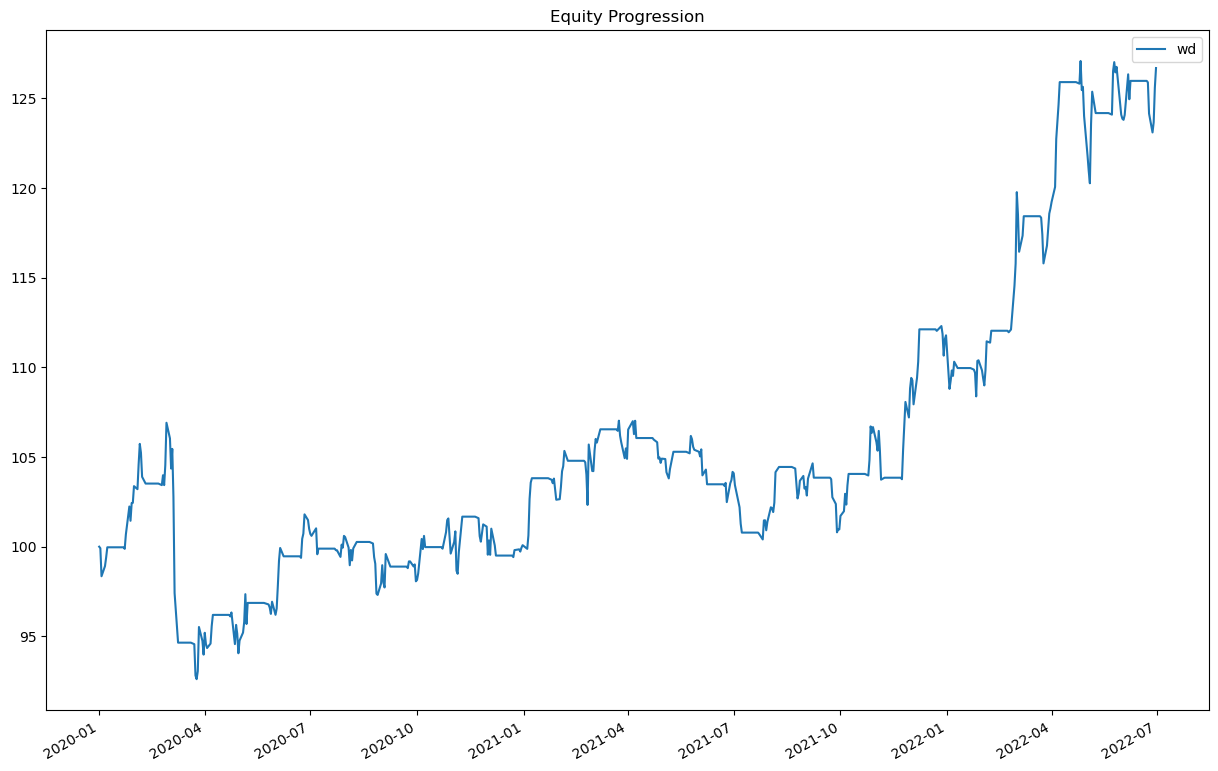

In [32]:
first_res.plot(figsize=(15, 10))

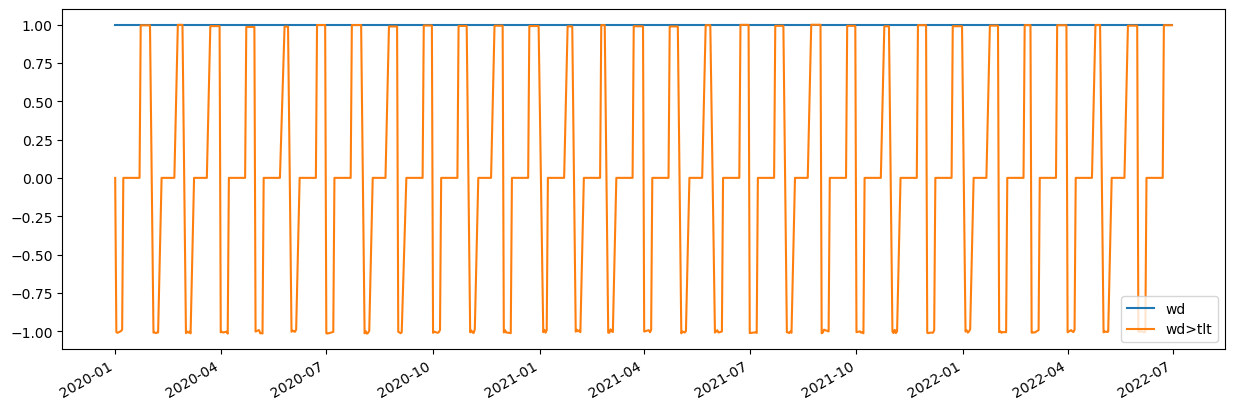

In [33]:
first_res.plot_weights('wd', figsize=(15,5))

In [40]:
def shuffle_prices(df):
    shuffled = df.sample(frac=1)
    shuffled.index = df.index
    return shuffled

In [44]:
runs = 1000
initial_sharpe = first_res['wd'].daily_sharpe
sharpes = []

In [53]:
for run in range(0, runs):
    shuffled = shuffle_prices(data)
    shuffled_with_dom = add_dom(shuffled)
    weights = add_weights(shuffled_with_dom, 'tlt')
    strategy = build_strategy(weights)
    backtest = build_backtest(strategy, shuffled_with_dom, initial_capital, commission_model)
    res = bt.run(backtest)
    sharpe = res['wd'].daily_sharpe
    sharpes.append(sharpe)

/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in divide
  res = np.divide(er.mean(), std)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in divide
  res = np.divide(er.mean(), std)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version.

/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:1376: RuntimeWarning: invalid value encountered in double_scalars
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:1376: RuntimeWarning: invalid value encountered in double_scalars
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: it

/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in divide
  res = np.divide(er.mean(), std)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in divide
  res = np.divide(er.mean(), std)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, meth

/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:1376: RuntimeWarning: invalid value encountered in double_scalars
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in divide
  res = np.divide(er.mean(), std)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:1376: RuntimeWarning: invalid value encountered in double_scalars
  return (prices.iloc[

/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:1376: RuntimeWarning: invalid value encountered in double_scalars
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in divide
  res = np.divide(er.mean(), std)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:1376: RuntimeWarning: invalid value encountered in double_scalars
  return (prices.iloc[

/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:1376: RuntimeWarning: invalid value encountered in double_scalars
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in divide
  res = np.divide(er.mean(), std)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:1376: RuntimeWarning: invalid value encountered in double_scalars
  return (prices.iloc[

/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in divide
  res = np.divide(er.mean(), std)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in divide
  res = np.divide(er.mean(), std)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, meth

/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in divide
  res = np.divide(er.mean(), std)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in divide
  res = np.divide(er.mean(), std)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in divide
  res = np.divide(er.mean(), std)
/User

/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:1376: RuntimeWarning: invalid value encountered in double_scalars
  return (prices.iloc[-1] / prices.iloc[0]) ** (1 / year_frac(start, end)) - 1
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWar

/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in divide
  res = np.divide(er.mean(), std)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: invalid value encountered in divide
  res = np.divide(er.mean(), std)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, meth

Exception: Newton Method like root search for quantity is stuck! q did not change in iterations so it is probably a bug but we are not entirely sure it is wrong! Consider  changing to warning.

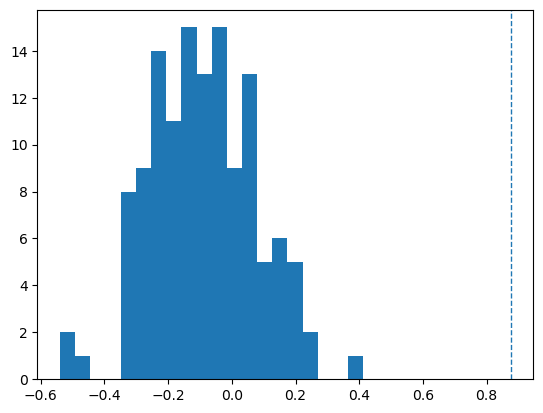

In [54]:
dist = plt.hist(sharpes, bins=20)
plt.axvline(initial_sharpe, linestyle='dashed', linewidth=1)

In [ ]:
N = sum(i > initial_sharpe for i in sharpes)
p_value = N / runs

In [ ]:
p_value